In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

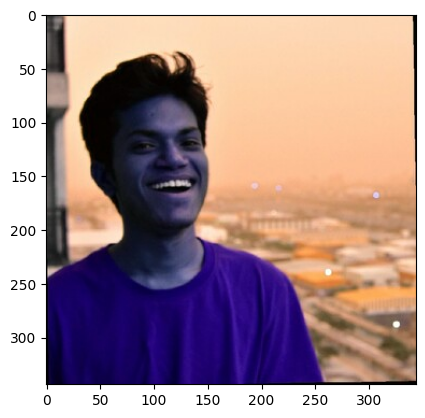

In [4]:
img = cv2.imread('backend/1641651321029_43.jpeg')
plt.imshow(img)

In [5]:
face_cascade = cv2.CascadeClassifier('backend/haarcascades/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

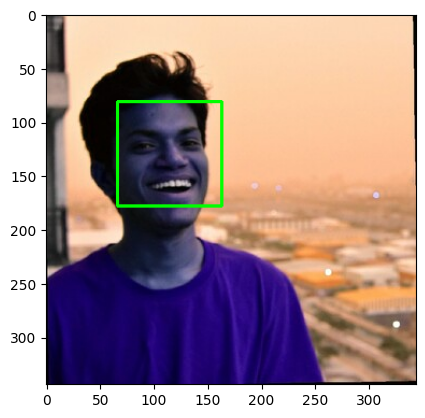

In [6]:
plt.imshow(img)

In [7]:
face_cascade = cv2.CascadeClassifier('backend/haarcascades/haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

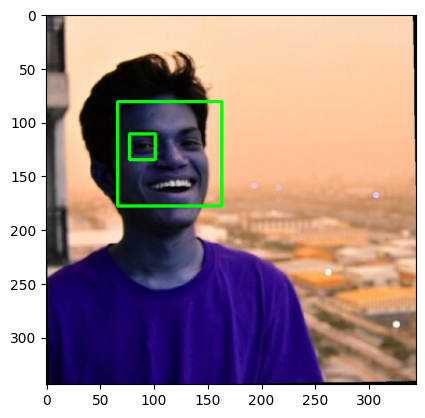

In [8]:
plt.imshow(img)

In [9]:
from backend import faceRecognition
img_w = faceRecognition.w2d(img,'db1',5)

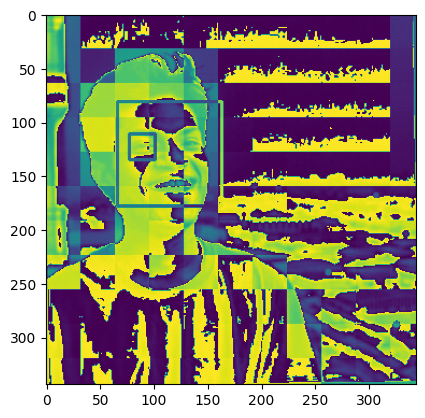

In [10]:
plt.imshow(img_w)

In [11]:
import json
import pandas as pd
#svm
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [12]:
face_dict =  faceRecognition.load()

['./Img_Collect/Aushmaan Khurana', './Img_Collect/Alia bhatt']
generated cropped image in folder ./Img_Collect/cropped/Aushmaan Khurana
generated cropped image in folder ./Img_Collect/cropped/Alia bhatt


In [13]:
with open("backend/face_dict.json",'r') as f:
        face_dict =   json.load(f)

In [14]:
df = pd.DataFrame(columns=['model','score'])

In [15]:
algo_dict = {
     'svm':  SVC(kernel='rbf', C =10),
     'random_forest':  RandomForestClassifier(n_estimators=100, random_state=42),
     'logistic_regression': LogisticRegression()         
}

In [16]:
X,y = faceRecognition.getInput(face_dict)
X_train,X_tests,y_train,y_test = train_test_split(X,y,test_size = 0.50,random_state=42)

{'Aushmaan Khurana': 0, 'Alia bhatt': 1}


In [17]:

for algo_name,algo_model in algo_dict.items():
       model_fit = algo_model.fit(X_train,y_train)
       y_pred = model_fit.predict(X_tests)
       score = accuracy_score(y_pred,y_test)
       df = pd.concat([df, pd.DataFrame({'model': algo_name, 'score': score}, index=[0])], ignore_index=True)

In [18]:
df

,model,score
0,svm,0.918919
1,random_forest,0.972973
2,logistic_regression,0.891892


In [40]:
import pickle
pipe = Pipeline([('scaler',StandardScaler()),('lr',  RandomForestClassifier(n_estimators=100, random_state=42))])
pipe.fit(X_train,y_train)

with open('backend/model.pkl','wb') as f:
                    pickle.dump(pipe,f)

In [41]:
y_pred = model.predict(X_tests)
score = accuracy_score(y_pred,y_test)
score

0.14516129032258066

/var/folders/n1/0ldhttss76l3qzjr12xnvs5w0000gn/T/ipykernel_1766/2259392483.py:4: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix


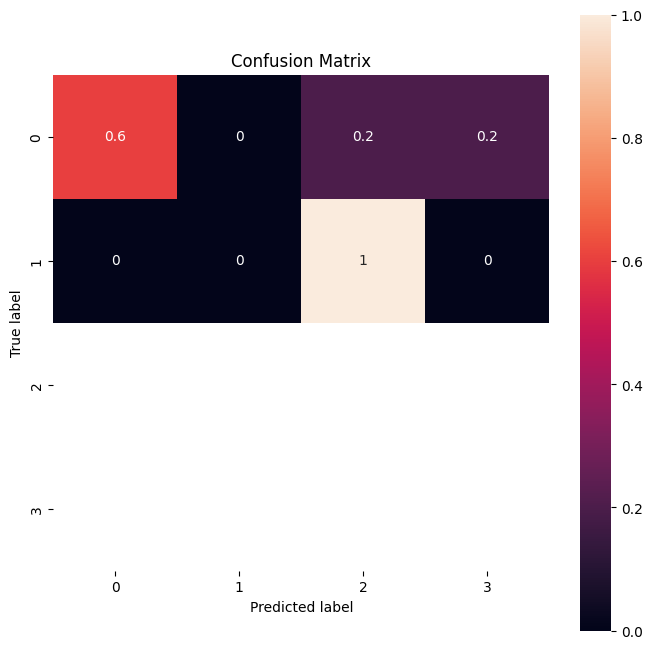

In [42]:
import numpy as np
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_norm, annot=True, square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Confusion Matrix")
plt.show()

In [43]:
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.15        62
   macro avg       0.25      0.15      0.19        62
weighted avg       0.24      0.15      0.18        62



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [44]:
score_l  = cross_val_score(LogisticRegression(), X, y, cv=5)
score_svc = cross_val_score(SVC(kernel='rbf', C =10),X,y,cv=5)
scrore_rf = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),X,y,cv=5)

In [48]:
scrore_rf

array([0.92      , 0.96      , 0.96      , 0.96      , 0.91666667])